## Chinese Loans to African Countries by Natural Resource Reserves

## Setup

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

/Users/jainsabr/workspace/china_africa_aid_resources/env/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Import Data

In [6]:
ad_gcdfd = pd.read_excel(r'AidData_GCDFD_v2.xlsx', sheet_name='AidData_GCDFD_v2')
ad_gcdfd

,AidData TUFF Project ID,Recommended For Aggregates,Umbrella,Financier Country,Recipient,Recipient Region,Commitment Year,Commitment Year Estimated,Implementation Start Year,Completion Year,...,Geographic Location,geoJSON URL Viz,geoJSON URL DL,Contact Name,Contact Position,ODA Eligible Recipient,Source Quality Score,Data Completeness Score,Project Implementation Score,Loan Detail Score
0,53631,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,No,2017.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,Yes,5,3,4.0,NaN
1,53632,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,No,NaN,NaN,...,This project is located at Kabul University. T...,https://github.com/aiddata/china-osm-geodata/b...,https://raw.githubusercontent.com/aiddata/chin...,NaN,NaN,Yes,5,2,2.0,NaN
2,53633,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,No,2017.0,2017.0,...,NaN,NaN,NaN,NaN,NaN,Yes,5,3,4.0,NaN
3,53634,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,No,2017.0,2019.0,...,This project involved the construction of a co...,https://github.com/aiddata/china-osm-geodata/b...,https://raw.githubusercontent.com/aiddata/chin...,NaN,NaN,Yes,5,5,5.0,NaN
4,53636,Yes,No,China (People's Republic of),Afghanistan,Asia,2017,No,NaN,2017.0,...,NaN,NaN,NaN,NaN,NaN,Yes,5,3,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13422,16239,No,Yes,China (People's Republic of),Zimbabwe,Africa,2000,No,2000.0,NaN,...,NaN,NaN,NaN,He Xiaowei|Simba Makoni,Assistant Minister of Foreign Trade and Econom...,Yes,1,4,NaN,NaN
13423,16401,Yes,No,China (People's Republic of),Zimbabwe,Africa,2000,No,2000.0,2000.0,...,NaN,NaN,NaN,Charles Kuwaza|Huang Guifang,Senior Secretary of the Ministry of Finance|Ch...,Yes,1,3,3.0,NaN
13424,63472,Yes,No,China (People's Republic of),Zimbabwe,Africa,2000,No,NaN,NaN,...,The Sino-Zimbabwe Cement Plant is located in L...,NaN,NaN,NaN,NaN,Yes,5,4,2.0,5.0
13425,72639,Yes,No,China (People's Republic of),Zimbabwe,Africa,2000,No,2000.0,2002.0,...,The 8th medical team was stationed at the Hara...,https://github.com/aiddata/china-osm-geodata/b...,https://raw.githubusercontent.com/aiddata/chin...,NaN,NaN,Yes,5,2,4.0,NaN


In [9]:
gcdfd_loans = ad_gcdfd[ad_gcdfd['Flow Type'] == 'Loan']
gcdfd_loans

,AidData TUFF Project ID,Recommended For Aggregates,Umbrella,Financier Country,Recipient,Recipient Region,Commitment Year,Commitment Year Estimated,Implementation Start Year,Completion Year,...,Geographic Location,geoJSON URL Viz,geoJSON URL DL,Contact Name,Contact Position,ODA Eligible Recipient,Source Quality Score,Data Completeness Score,Project Implementation Score,Loan Detail Score
24,65676,Yes,No,China (People's Republic of),Angola,Africa,2017,Yes,2017.0,NaN,...,This project involved the construction of mode...,https://github.com/aiddata/china-osm-geodata/b...,https://raw.githubusercontent.com/aiddata/chin...,NaN,NaN,Yes,5,3,4.0,2.0
25,66314,Yes,No,China (People's Republic of),Angola,Africa,2017,Yes,NaN,NaN,...,This project supported the construction of the...,https://github.com/aiddata/china-osm-geodata/b...,https://raw.githubusercontent.com/aiddata/chin...,NaN,NaN,Yes,5,2,3.0,1.0
26,66876,Yes,No,China (People's Republic of),Angola,Africa,2017,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,5,5,NaN,4.0
27,66878,Yes,No,China (People's Republic of),Angola,Africa,2017,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,5,5,NaN,4.0
28,67114,Yes,No,China (People's Republic of),Angola,Africa,2017,No,2017.0,NaN,...,Zaire,NaN,NaN,NaN,NaN,Yes,5,4,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13412,34187,Yes,No,China (People's Republic of),Viet Nam,Asia,2000,No,2000.0,2002.0,...,The purpose of the project was to upgrade and ...,https://github.com/aiddata/china-osm-geodata/b...,https://raw.githubusercontent.com/aiddata/chin...,NaN,NaN,Yes,5,5,5.0,5.0
13414,34207,Yes,No,China (People's Republic of),Viet Nam,Asia,2000,No,2000.0,2001.0,...,The purpose of the project was to construct a ...,https://github.com/aiddata/china-osm-geodata/b...,https://raw.githubusercontent.com/aiddata/chin...,Sun Guangxiang|Bui Hong Phuc,Chinese Deputy Minister of Foreign Trade and E...,Yes,5,5,5.0,5.0
13415,63676,Yes,No,China (People's Republic of),Viet Nam,Asia,2000,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Yes,4,3,NaN,3.0
13422,16239,No,Yes,China (People's Republic of),Zimbabwe,Africa,2000,No,2000.0,NaN,...,NaN,NaN,NaN,He Xiaowei|Simba Makoni,Assistant Minister of Foreign Trade and Econom...,Yes,1,4,NaN,NaN


In [39]:
gcdfd_loans_year = gcdfd_loans[['Recipient', 'Commitment Year', 'Amount (Constant USD2017)']]
gcdfd_loans_year

,Recipient,Commitment Year,Amount (Constant USD2017)
24,Angola,2017,6.000000e+07
25,Angola,2017,NaN
26,Angola,2017,1.000000e+09
27,Angola,2017,1.000000e+09
28,Angola,2017,4.050535e+08
...,...,...,...
13412,Viet Nam,2000,4.793798e+07
13414,Viet Nam,2000,3.411794e+07
13415,Viet Nam,2000,1.399232e+07
13422,Zimbabwe,2000,5.381660e+06


In [41]:
gcdfd_loans_year_total = gcdfd_loans_year.groupby(['Recipient', 'Commitment Year']).sum()
gcdfd_loans_year[gcdfd_loans_year['Recipient'] == 'Zimbabwe']
df = gcdfd_loans_year.groupby(['Recipient', 'Commitment Year'])['Amount (Constant USD2017)'].sum().reset_index()

   Recipient  Commitment Year  Amount (Constant USD2017)
22    Angola             2001               1.222235e+08
23    Angola             2002               0.000000e+00
24    Angola             2003               2.325888e+07
25    Angola             2004               7.156598e+08
26    Angola             2005               8.306864e+07
27    Angola             2006               1.311113e+09
28    Angola             2007               4.684305e+07
29    Angola             2008               1.786820e+08
30    Angola             2009               2.804291e+09
31    Angola             2010               4.264058e+09
32    Angola             2011               2.148514e+09
33    Angola             2012               1.846259e+09
34    Angola             2013               3.359844e+09
35    Angola             2014               4.336041e+09
36    Angola             2015               1.184797e+10
37    Angola             2016               1.494787e+10
38    Angola             2017  

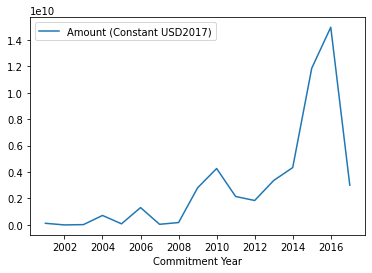

    Recipient  Commitment Year  Amount (Constant USD2017)
182  Cameroon             2007               1.193669e+08
183  Cameroon             2008               3.808774e+06
184  Cameroon             2009               6.297674e+07
185  Cameroon             2010               1.099906e+08
186  Cameroon             2011               1.624014e+08
187  Cameroon             2013               2.621677e+08
188  Cameroon             2015               2.068631e+08
189  Cameroon             2016               4.551241e+08
190  Cameroon             2017               4.450395e+08


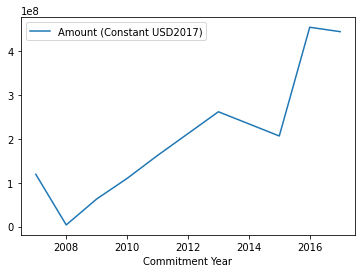

    Recipient  Commitment Year  Amount (Constant USD2017)
346  Ethiopia             2001               3.361145e+07
347  Ethiopia             2005               9.229373e+06
348  Ethiopia             2006               1.564205e+09
349  Ethiopia             2009               8.865262e+08
350  Ethiopia             2010               6.792675e+08
351  Ethiopia             2011               1.975827e+09
352  Ethiopia             2012               1.549086e+08
353  Ethiopia             2013               5.085066e+09
354  Ethiopia             2014               1.477729e+09
355  Ethiopia             2015               2.015462e+09
356  Ethiopia             2016               6.948819e+08
357  Ethiopia             2017               2.244940e+08


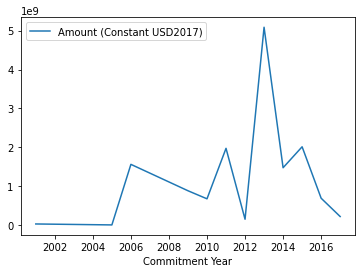

    Recipient  Commitment Year  Amount (Constant USD2017)
689   Nigeria             2003               0.000000e+00
690   Nigeria             2004               0.000000e+00
691   Nigeria             2005               6.041472e+08
692   Nigeria             2006               3.526867e+07
693   Nigeria             2008               8.324226e+08
694   Nigeria             2010               2.782286e+10
695   Nigeria             2012               2.348672e+08
696   Nigeria             2013               6.412968e+09
697   Nigeria             2014               2.606550e+09
698   Nigeria             2016               2.476043e+09
699   Nigeria             2017               5.898008e+09


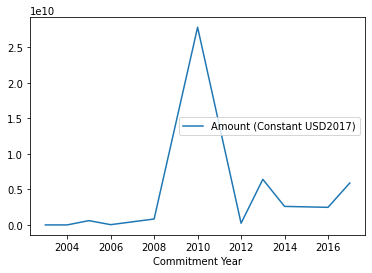

    Recipient  Commitment Year  Amount (Constant USD2017)
487     Kenya             2001               1.318426e+07
488     Kenya             2002               4.377188e+07
489     Kenya             2005               4.989352e+07
490     Kenya             2006               7.897226e+07
491     Kenya             2007               7.307703e+07
492     Kenya             2008               1.058967e+08
493     Kenya             2009               3.253035e+08
494     Kenya             2010               2.496875e+08
495     Kenya             2011               1.821539e+08
496     Kenya             2012               1.201435e+09
497     Kenya             2013               2.502301e+08
498     Kenya             2014               1.736956e+08
499     Kenya             2015               1.101130e+08
500     Kenya             2016               5.903117e+09
501     Kenya             2017               9.799585e+08


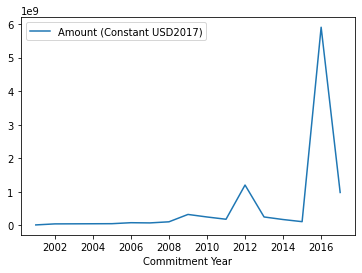

In [42]:
recipients = ['Angola', 'Cameroon', 'Ethiopia', 'Nigeria', 'Kenya']
for recipient in recipients: 
    df1 = df[df['Recipient'] == recipient]
    print(df1)
    df1.plot(kind='line', x = 'Commitment Year', y = 'Amount (Constant USD2017)')
    plt.show()